In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import os
import csv

In [2]:
data = pd.read_csv("new_data/metadata.tsv", sep = '\t',dtype = {'Variant': 'string',
                                                                 'Is reference?': 'string',
                                                                 'Is complete?': 'string'})
data.head()

/tmp/ipykernel_116408/1191610418.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("new_data/metadata.tsv", sep = '\t',dtype = {'Variant': 'string',


,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Pango version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
0,hCoV-19/USA/CA-CDPH-3000129179/2021,NaN,Original,betacoronavirus,EPI_ISL_4509673,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_G215C,N_D63G,N_R203M,NSP12_G671S,NS3_S26L,S...",2021-09-25,<NA>,True,NaN,True,0.082560,0.381359
1,hCoV-19/USA/CA-CDPH-3000129156/2021,NaN,Original,betacoronavirus,EPI_ISL_4509664,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_G215C,Spike_T95I,N_D63G,N_R203M,NSP12_G671S...",2021-09-25,<NA>,True,NaN,NaN,0.014741,0.379523
2,hCoV-19/USA/CA-CDPH-3000129117/2021,NaN,Original,betacoronavirus,EPI_ISL_4509640,2021-07-27,North America / USA / California / San Diego C...,NaN,29849,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_D377Y,Spike_V1264L,M_I82T,NSP6_V149A,N_D63G...",2021-09-25,<NA>,True,NaN,True,0.139770,0.382482
3,hCoV-19/USA/CA-CDPH-3000129102/2021,NaN,Original,betacoronavirus,EPI_ISL_4509633,2021-07-27,North America / USA / California / San Diego C...,NaN,29884,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(Spike_V1264L,N_D63G,N_R203M,NSP12_G671S,NS6_K...",2021-09-25,<NA>,True,True,NaN,0.004250,0.379575
4,hCoV-19/USA/CA-CDPH-3000129157/2021,NaN,Original,betacoronavirus,EPI_ISL_4509665,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(NS7a_L116F,N_D63G,N_R203M,NSP12_G671S,NSP2_S3...",2021-09-25,<NA>,True,True,NaN,0.004222,0.379496


In [3]:
data = data[data['Variant'].notna()]
data.head()

,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Pango version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
0,hCoV-19/USA/CA-CDPH-3000129179/2021,NaN,Original,betacoronavirus,EPI_ISL_4509673,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_G215C,N_D63G,N_R203M,NSP12_G671S,NS3_S26L,S...",2021-09-25,<NA>,True,NaN,True,0.082560,0.381359
1,hCoV-19/USA/CA-CDPH-3000129156/2021,NaN,Original,betacoronavirus,EPI_ISL_4509664,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_G215C,Spike_T95I,N_D63G,N_R203M,NSP12_G671S...",2021-09-25,<NA>,True,NaN,NaN,0.014741,0.379523
2,hCoV-19/USA/CA-CDPH-3000129117/2021,NaN,Original,betacoronavirus,EPI_ISL_4509640,2021-07-27,North America / USA / California / San Diego C...,NaN,29849,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(N_D377Y,Spike_V1264L,M_I82T,NSP6_V149A,N_D63G...",2021-09-25,<NA>,True,NaN,True,0.139770,0.382482
3,hCoV-19/USA/CA-CDPH-3000129102/2021,NaN,Original,betacoronavirus,EPI_ISL_4509633,2021-07-27,North America / USA / California / San Diego C...,NaN,29884,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(Spike_V1264L,N_D63G,N_R203M,NSP12_G671S,NS6_K...",2021-09-25,<NA>,True,True,NaN,0.004250,0.379575
4,hCoV-19/USA/CA-CDPH-3000129157/2021,NaN,Original,betacoronavirus,EPI_ISL_4509665,2021-07-27,North America / USA / California / San Diego C...,NaN,29848,Human,...,consensus call,Former VOC Delta GK (B.1.617.2+AY.*) first det...,"(NS7a_L116F,N_D63G,N_R203M,NSP12_G671S,NSP2_S3...",2021-09-25,<NA>,True,True,NaN,0.004222,0.379496


In [4]:
data.columns

Index(['Virus name', 'Last vaccinated', 'Passage details/history', 'Type',
       'Accession ID', 'Collection date', 'Location',
       'Additional location information', 'Sequence length', 'Host',
       'Patient age', 'Gender', 'Clade', 'Pango lineage', 'Pango version',
       'Variant', 'AA Substitutions', 'Submission date', 'Is reference?',
       'Is complete?', 'Is high coverage?', 'Is low coverage?', 'N-Content',
       'GC-Content'],
      dtype='object')

In [5]:
# Assuming 'data' is already loaded as a DataFrame
unique_lineages = data['Pango lineage'].unique()

# Convert to a list and print all elements
unique_lineages_list = unique_lineages.tolist()

# Display all elements
print(unique_lineages_list)

['AY.25.1', 'AY.20', 'AY.26', 'AY.14', 'AY.116.1', 'AY.44', 'AY.118', 'AY.103', 'AY.3', 'P.1', 'AY.75', 'P.1.17', 'AY.67', 'AY.13', 'AY.54', 'B.1.621', 'AY.119', 'B.1.617.2', 'AY.2', 'AY.100', 'AY.122', 'AY.25', 'AY.35', 'AY.39', 'AY.43', 'AY.47', 'AY.48', 'P.1.10', 'AY.105', 'AY.52', 'B.1.621.1', 'B.1.1.7', 'AY.42', 'AY.126', 'AY.5', 'B.1.429', 'AY.3.1', 'AY.4', 'C.37', 'AY.113', 'P.1.15', 'AY.110', 'AY.99.2', 'P.1.14', 'BA.1', 'BA.2', 'AY.1', 'AY.117', 'BA.5.2.21', 'B.1.427', 'AY.33', 'Q.3', 'AY.121', 'AY.114', 'AY.74', 'AY.120.1', 'AY.119.2', 'AY.46.4', 'AY.112', 'JN.1.4', 'BA.1.1', 'BA.1.15', 'BF.10', 'BA.1.17', 'B.1.526', 'BA.2.3', 'BA.2.12.1', 'BA.2.12', 'BE.1', 'BA.2.9', 'BA.2.53', 'BA.2.10', 'BF.21', 'P.2', 'P.1.13', 'AY.120', 'BA.2.18', 'AY.98.1', 'AY.36', 'B.1.525', 'BQ.1.1', 'XBB.1.5', 'XBB.1.15', 'BA.4.6.5', 'BA.4.1', 'BA.4.2', 'AY.88', 'AY.9', 'AY.64', 'AY.39.1', 'AY.62', 'AY.16', 'BA.1.20', 'BA.1.18', 'BA.1.1.18', 'P.1.7', 'AY.127', 'AY.46.2', 'AY.51', 'XBB.1.5.30', 'XBB.

In [6]:
import pandas as pd

# Assuming 'data' is already loaded as a DataFrame
unique_lineages = data['Pango lineage'].unique()

# Convert to a list
unique_lineages_list = unique_lineages.tolist()

# Filter the list for elements that start with 'JN', ensuring the element is a string
jn_lineages = [lineage for lineage in unique_lineages_list if isinstance(lineage, str) and lineage.startswith('JN')]

# Print all elements that start with 'JN'
for lineage in jn_lineages:
    print(lineage)


JN.1.4
JN.1
JN.1.4.5
JN.1.2
JN.1.1
JN.1.6
JN.1.42
JN.1.9
JN.1.7
JN.1.19
JN.1.4.7
JN.4
JN.10
JN.1.43
JN.1.31
JN.1.38
JN.1.16
JN.1.8.1
JN.1.4.4
JN.1.45
JN.1.20
JN.3
JN.1.39
JN.1.1.1
JN.1.22
JN.1.3
JN.1.30
JN.2
JN.1.32
JN.9
JN.1.18
JN.11
JN.1.5
JN.2.5
JN.1.4.6
JN.1.8.3
JN.7
JN.5
JN.2.3
JN.1.25
JN.1.17
JN.1.8
JN.6
JN.1.16.1
JN.1.7.2
JN.1.13.1
JN.1.1.6
JN.2.1
JN.1.15
JN.1.21
JN.1.1.4
JN.1.9.1
JN.1.4.1
JN.1.11.1
JN.1.28
JN.1.46
JN.1.35
JN.3.2
JN.1.28.1
JN.1.29
JN.1.1.2
JN.1.10
JN.1.1.5
JN.12
JN.1.11
JN.1.13
JN.14
JN.2.2
JN.1.25.1
JN.1.37
JN.1.30.1
JN.1.24
JN.1.44
JN.5.1
JN.1.4.2
JN.1.43.1
JN.1.41
JN.1.1.7
JN.3.1
JN.1.2.1
JN.1.14
JN.1.4.3
JN.8
JN.2.4
JN.1.34
JN.1.40
JN.3.2.1
JN.1.6.1
JN.1.26
JN.1.8.2
JN.1.36.1
JN.1.27
JN.13
JN.1.12
JN.1.7.1
JN.1.33
JN.1.18.2
JN.1.42.1
JN.1.36
JN.1.18.1
JN.1.23
JN.13.1
JN.1.7.3
JN.2.2.1


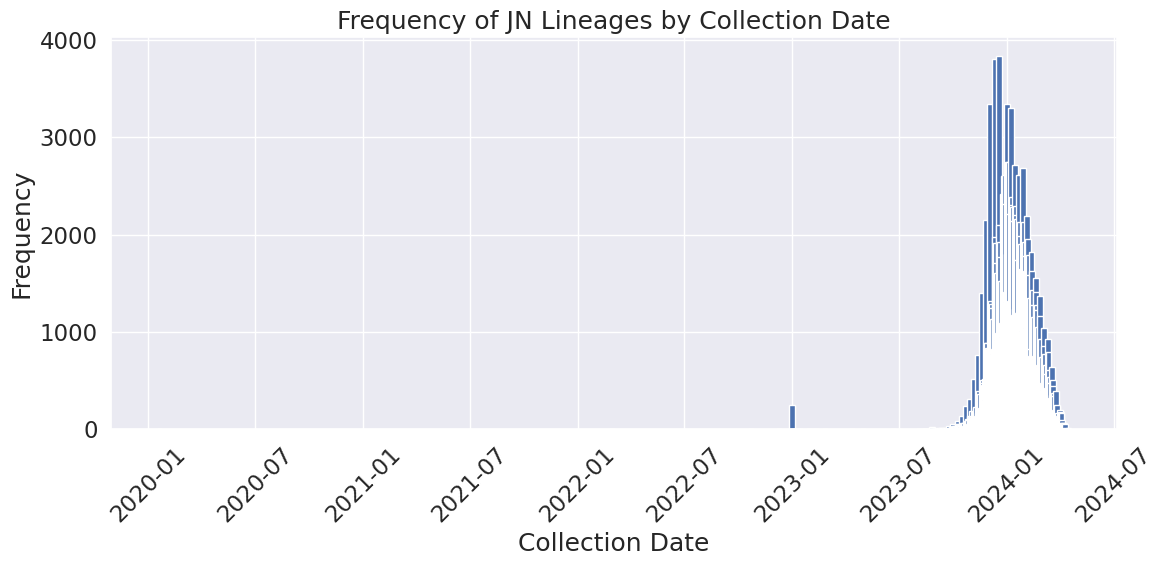

In [7]:
# Filter the data for lineages starting with 'JN'
jn_data = data[data['Pango lineage'].str.startswith('JN', na=False)]

# Group by collection date and count occurrences
jn_grouped = jn_data.groupby('Collection date').size().reset_index(name='counts')

# Convert 'Collection date' to datetime format for proper plotting
jn_grouped['Collection date'] = pd.to_datetime(jn_grouped['Collection date'])

# Sort the data by collection date
jn_grouped = jn_grouped.sort_values('Collection date')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(jn_grouped['Collection date'], jn_grouped['counts'], width=10)
plt.xlabel('Collection Date')
plt.ylabel('Frequency')
plt.title('Frequency of JN Lineages by Collection Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

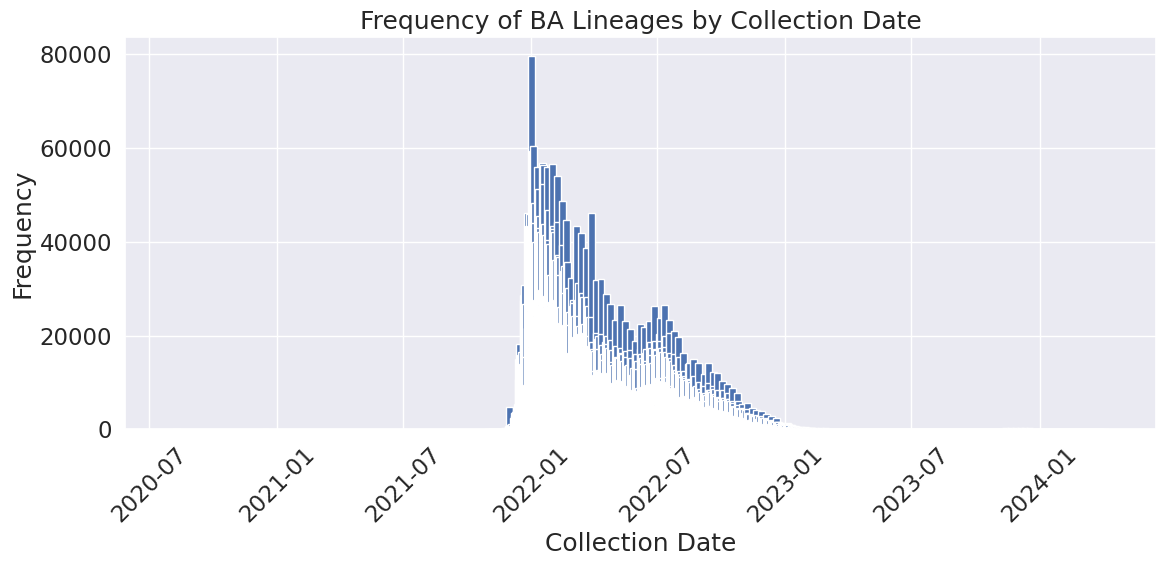

In [8]:
# Filter the data for lineages starting with 'JN'
ba_data = data[data['Pango lineage'].str.startswith('BA', na=False)]

# Group by collection date and count occurrences
ba_grouped = ba_data.groupby('Collection date').size().reset_index(name='counts')

# Convert 'Collection date' to datetime format for proper plotting
ba_grouped['Collection date'] = pd.to_datetime(ba_grouped['Collection date'])

# Sort the data by collection date
ba_grouped = ba_grouped.sort_values('Collection date')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(ba_grouped['Collection date'], ba_grouped['counts'], width=10)
plt.xlabel('Collection Date')
plt.ylabel('Frequency')
plt.title('Frequency of BA Lineages by Collection Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

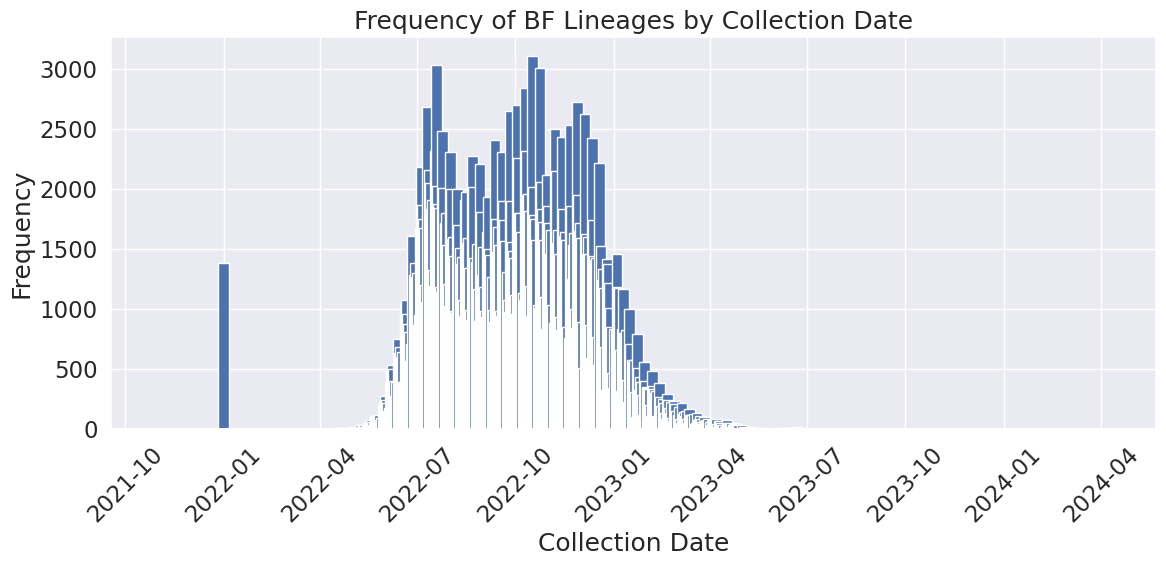

In [9]:
# Filter the data for lineages starting with 'JN'
bf_data = data[data['Pango lineage'].str.startswith('BF', na=False)]

# Group by collection date and count occurrences
bf_grouped = bf_data.groupby('Collection date').size().reset_index(name='counts')

# Convert 'Collection date' to datetime format for proper plotting
bf_grouped['Collection date'] = pd.to_datetime(bf_grouped['Collection date'])

# Sort the data by collection date
bf_grouped = bf_grouped.sort_values('Collection date')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(bf_grouped['Collection date'], bf_grouped['counts'], width=10)
plt.xlabel('Collection Date')
plt.ylabel('Frequency')
plt.title('Frequency of BF Lineages by Collection Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
data['Variant'].unique()

<StringArray>
[                                          'Former VOC Delta GK (B.1.617.2+AY.*) first detected in India',
                                 'Former VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan',
                                        'Former VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia',
                                            'Former VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK',
                       'Former VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California',
                                      'Former VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru',
              'Former VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa',
                                             'VOI GRA (JN.1+JN.1.*) first detected in Luxembourg/Iceland',
                                    'Former VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York',
                       

In [11]:
df = data

In [15]:
gra = df[df['Clade'] == 'GRA']
gra.head() #JN* IS IN gra

,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Pango version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
653,hCoV-19/USA/CA-CDPH-3000303686/2022,NaN,Original,betacoronavirus,EPI_ISL_9937783,2022-01-27,North America / USA / California / Contra Cost...,NaN,29813,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-16,<NA>,True,NaN,NaN,0.022205,0.379335
673,hCoV-19/Scotland/QEUH-3A8E22F/2022,NaN,Original,betacoronavirus,EPI_ISL_11289224,2022-03-12,Europe / United Kingdom / Scotland,NaN,29724,Human,...,PANGO-v1.23.1,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-03-22,<NA>,True,NaN,NaN,NaN,0.378919
726,hCoV-19/USA/CA-CDPH-FS25391640/2022,NaN,Original,betacoronavirus,EPI_ISL_14616236,2022-08-03,North America / USA / California / Merced County,NaN,29608,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,NSP3_G489S,Spike_L24d...",2022-08-25,<NA>,True,NaN,NaN,NaN,0.378648
1388,hCoV-19/Netherlands/UT-RIVM-101956/2022,NaN,Original,betacoronavirus,EPI_ISL_13214532,2022-05-21,Europe / Netherlands / Utrecht,NaN,29728,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,NSP2_A336V,Spike_L24del...",2022-06-10,<NA>,True,NaN,NaN,NaN,0.379104
1389,hCoV-19/Canada/QC-L00467246001/2022,NaN,Original,betacoronavirus,EPI_ISL_12639341,2022-04-19,North America / Canada / Quebec,NaN,29709,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-05-11,<NA>,True,NaN,NaN,0.007439,0.378595


In [13]:
#all pango lineages associated with GRA submissions

gra['Pango lineage'].unique()

array(['BA.1', 'BA.2', 'BA.5.2.21', ..., 'B.1.1', 'XCF.1', 'AY.85'],
      dtype=object)

In [16]:
# Assuming 'data' is already loaded as a DataFrame
unique_lineages = gra['Pango lineage'].unique()

# Convert to a list and print all elements
unique_lineages_list = unique_lineages.tolist()

# Display all elements
print(unique_lineages_list)

['BA.1', 'BA.2', 'BA.5.2.21', 'JN.1.4', 'BA.1.1', 'BA.1.15', 'BF.10', 'BA.1.17', 'BA.2.3', 'BA.2.12.1', 'BA.2.12', 'BE.1', 'BA.2.9', 'BA.2.53', 'BA.2.10', 'BF.21', 'BA.2.18', 'BQ.1.1', 'XBB.1.5', 'XBB.1.15', 'BA.4.6.5', 'BA.4.1', 'BA.4.2', 'BA.1.20', 'BA.1.18', 'BA.1.1.18', 'XBB.1.5.30', 'XBB.1.5.4', 'BQ.1.1.54', 'FD.2', 'BN.1.5', 'DN.2', 'CQ.1.1', 'BQ.1.1.15', 'BA.2.65', 'BA.2.3.17', 'BA.2.31', 'BA.5.1.10', 'BF.5', 'BA.5.1.23', 'BA.1.1.2', 'BA.5.2.1', 'BA.5.1', 'BA.4', 'BA.5.1.1', 'BA.4.6', 'BA.5.2', 'BA.4.4', 'BF.28', 'BA.5.1.6', 'BA.5.6', 'BA.5.1.25', 'BA.5.2.2', 'BA.5.1.3', 'BA.5.5', 'BE.1.1', 'BA.2.13.1', 'BA.2.48', 'BA.2.9.7', 'BG.5', 'BA.4.1.6', 'BA.5', 'BF.27', 'BA.2.13', 'BF.24', 'BA.2.3.10', 'BA.2.38', 'BA.5.8', 'BE.3', 'BA.5.2.9', 'BA.2.23', 'BA.2.43', 'BA.2.76', 'BF.8', 'BA.2.41', 'BA.2.75', 'BF.26', 'BA.2.35', 'HT.1', 'XBB.1.5.66', 'XBB.1.16', 'XBB.1.5.39', 'BQ.1.1.1', 'BQ.1.1.10', 'BQ.1.13.1', 'BQ.1', 'BA.1.1.10', 'BF.7', 'BA.5.2.6', 'BA.2.31.1', 'XZ', 'BA.2.42', 'BA.2.3.

In [17]:
gra['Variant'].unique()

<StringArray>
[             'Former VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa',
                                             'VOI GRA (JN.1+JN.1.*) first detected in Luxembourg/Iceland',
                                 'VOI GRA (XBB.1.5+XBB.1.5.*) first detected in Austria/India/Bangladesh',
 'VUM GRA (XBB+XBB.* excluding XBB.1.5, XBB.1.16, XBB.1.9.1, XBB.1.9.2, XBB.2.3) first detected in India',
                                                    'VUM GRA (BA.2.75+BA.2.75.*) first detected in India',
                                                  'VOI GRA (XBB.1.16+XBB.1.16.*) first detected in India',
                                               'VOI GRA (EG.5+EG.5.*) first detected in Indonesia/France',
                                                'VUM GRA (XBB.2.3+XBB.2.3.*) first detected in India/USA',
                           'VUM GRA (XBB.1.9.1+XBB.1.9.1.*) first detected in Indonesia/Israel/Singapore',
                       

In [24]:
# Assuming 'gra' is your DataFrame
omicron_JN = gra[(gra['Variant'] == 'Former VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa') | 
                 (gra['Variant'] == 'VOI GRA (JN.1+JN.1.*) first detected in Luxembourg/Iceland')]

# Display the first few rows of the filtered DataFrame
omicron_JN.head()

,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Pango version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
653,hCoV-19/USA/CA-CDPH-3000303686/2022,NaN,Original,betacoronavirus,EPI_ISL_9937783,2022-01-27,North America / USA / California / Contra Cost...,NaN,29813,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-16,<NA>,True,NaN,NaN,0.022205,0.379335
673,hCoV-19/Scotland/QEUH-3A8E22F/2022,NaN,Original,betacoronavirus,EPI_ISL_11289224,2022-03-12,Europe / United Kingdom / Scotland,NaN,29724,Human,...,PANGO-v1.23.1,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-03-22,<NA>,True,NaN,NaN,NaN,0.378919
726,hCoV-19/USA/CA-CDPH-FS25391640/2022,NaN,Original,betacoronavirus,EPI_ISL_14616236,2022-08-03,North America / USA / California / Merced County,NaN,29608,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,NSP3_G489S,Spike_L24d...",2022-08-25,<NA>,True,NaN,NaN,NaN,0.378648
1388,hCoV-19/Netherlands/UT-RIVM-101956/2022,NaN,Original,betacoronavirus,EPI_ISL_13214532,2022-05-21,Europe / Netherlands / Utrecht,NaN,29728,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,NSP2_A336V,Spike_L24del...",2022-06-10,<NA>,True,NaN,NaN,NaN,0.379104
1389,hCoV-19/Canada/QC-L00467246001/2022,NaN,Original,betacoronavirus,EPI_ISL_12639341,2022-04-19,North America / Canada / Quebec,NaN,29709,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-05-11,<NA>,True,NaN,NaN,0.007439,0.378595


In [25]:
#print all unique pango lineages in omicron variant
omicron_JN['Pango lineage'].unique()

array(['BA.1', 'BA.2', 'BA.5.2.21', ..., 'B.1.1', 'XCF.1', 'AY.85'],
      dtype=object)

In [27]:
# # Assuming 'data' is already loaded as a DataFrame
# unique_lineages = omicron_JN['Pango lineage'].unique()

# # Convert to a list and print all elements
# unique_lineages_list = unique_lineages.tolist()

# # Display all elements
# print(unique_lineages_list)

In [29]:
len(omicron_JN['Pango lineage'].unique())   #total 1110 unique pango lineages in omicron variant

1110

In [33]:
omicron_jn_lineage_counts = pd.DataFrame.from_dict(omicron_JN['Pango lineage'].value_counts().to_dict(), orient='index')
omicron_jn_lineage_counts['pango_lin'] = omicron_jn_lineage_counts.index
omicron_jn_lineage_counts.columns = ['count','pango_lin']
omicron_jn_lineage_counts.head(-100)

,count,pango_lin
BA.2,1286796,BA.2
BA.1.1,1078520,BA.1.1
BA.1,464762,BA.1
BA.5.2.1,307081,BA.5.2.1
BA.5.2,296505,BA.5.2
...,...,...
JN.1.25.1,25,JN.1.25.1
BA.5.2.40,25,BA.5.2.40
KU.2,25,KU.2
BF.5.3,24,BF.5.3


<AxesSubplot: xlabel='pango_lin', ylabel='count'>

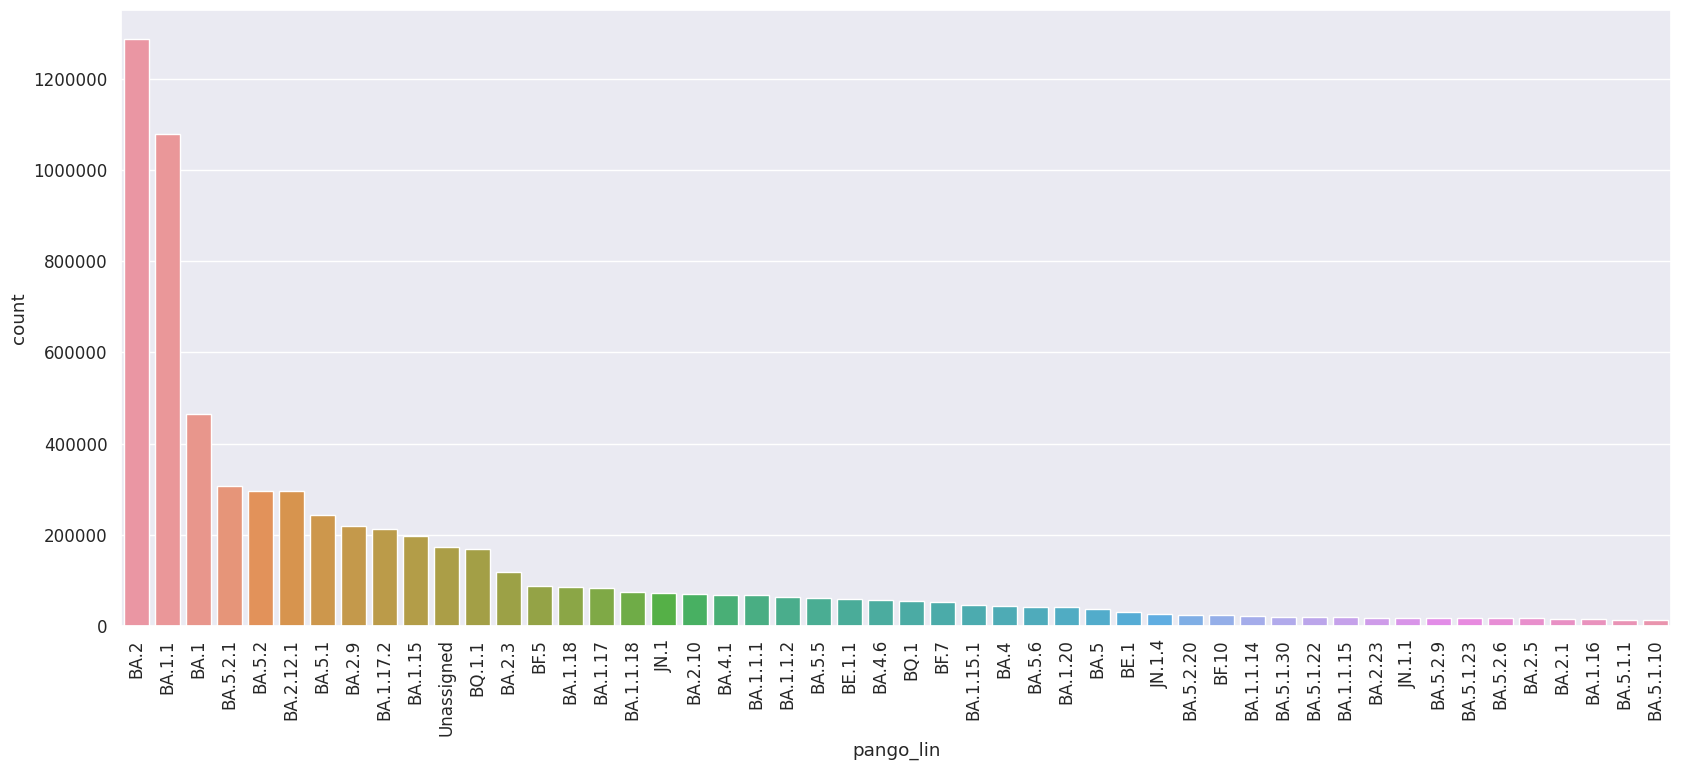

In [37]:
#most common Omicron sub lineages
sns.set_style("darkgrid")
sns.set(font_scale = 1.1,rc = {'figure.figsize':(20,8)})
ax = sns.barplot(x = omicron_jn_lineage_counts['pango_lin'].iloc[:50], y = omicron_jn_lineage_counts['count'].iloc[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.ticklabel_format(style='plain', axis='y')
ax

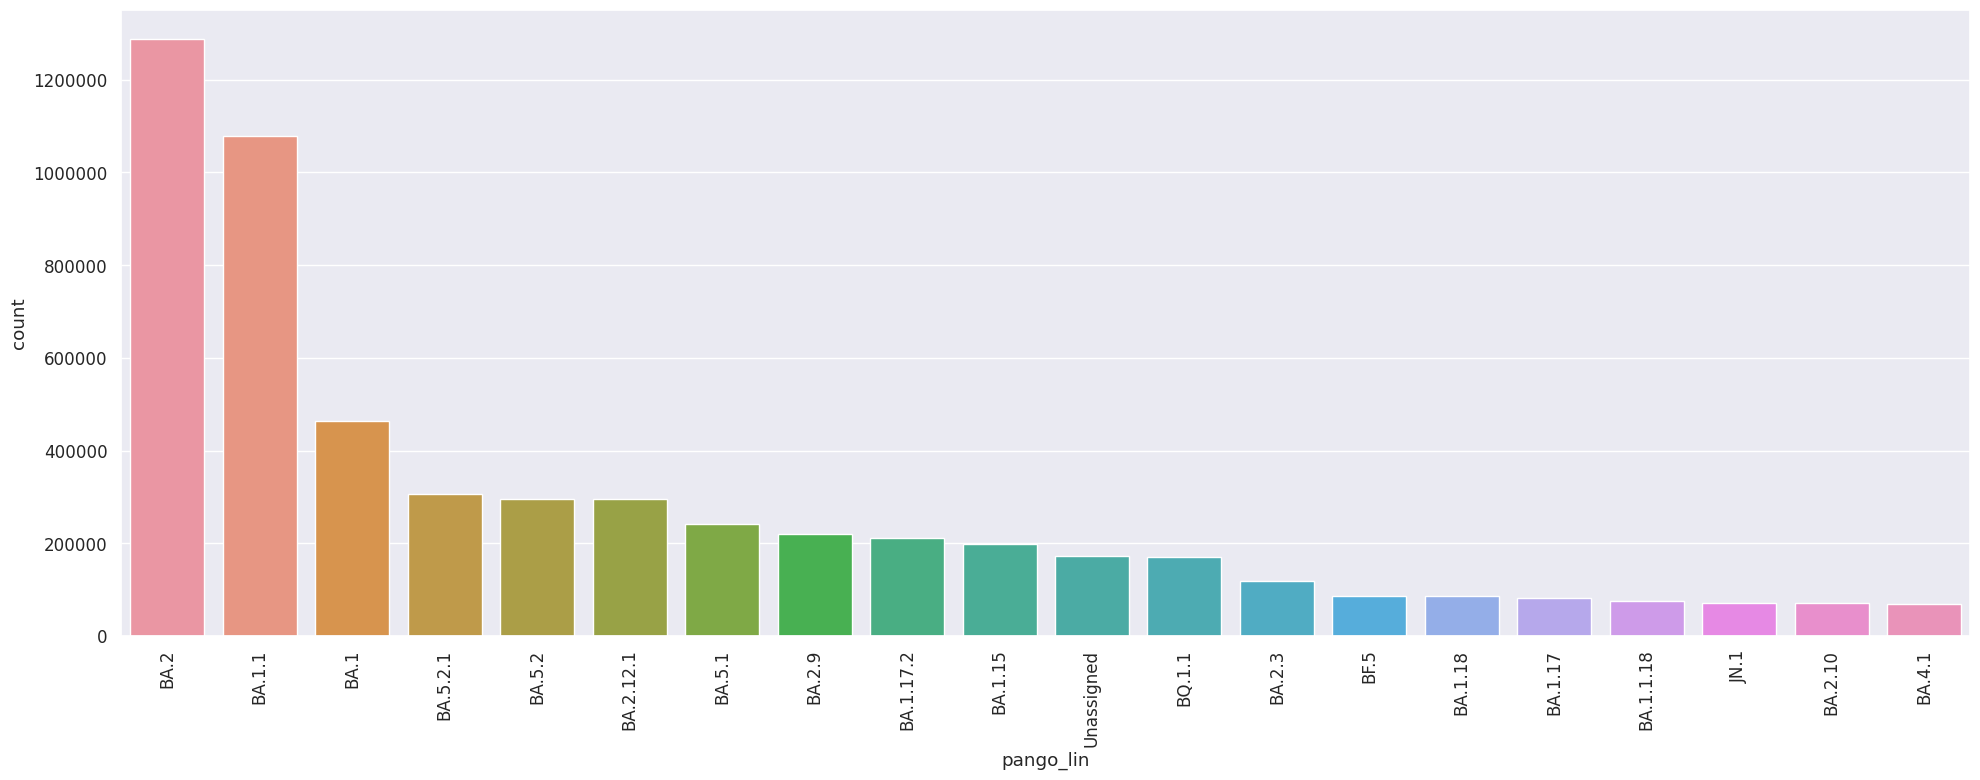

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'omicron_JN' is your DataFrame and you want to count the occurrences of each Pango lineage
omicron_jn_lineage_counts = omicron_JN['Pango lineage'].value_counts().reset_index()
omicron_jn_lineage_counts.columns = ['pango_lin', 'count']

# Plot the most common Omicron sub-lineages
sns.set_style("darkgrid")
sns.set(font_scale=1.1, rc={'figure.figsize':(20,8)})

# Create the bar plot
ax = sns.barplot(x=omicron_jn_lineage_counts['pango_lin'].iloc[:20], y=omicron_jn_lineage_counts['count'].iloc[:20])

# Set x-axis labels rotation and format y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.ticklabel_format(style='plain', axis='y')

# Ensure all bars are visible
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
%time
europe_list = ["Europe", "North America","Oceania", "Asia","South America", "Africa"]

for i in europe_list:
    
    omicron_JN.loc[omicron_JN['Location'].str.contains(i), 'Location'] = i

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 20.3 µs


In [39]:
omicron_JN['Location'].unique().tolist()[:25]

['North America',
 'Europe',
 'Asia',
 'South America',
 'Oceania',
 'Africa',
 'Caribbean / Haiti']

In [50]:
tmp = omicron_JN['Pango lineage'].str.split('.', expand=True)
tmp.head()

,0,1,2,3
653,BA,1,None,None
673,BA,2,None,None
726,BA,5,2,21
1388,BA,2,None,None
1389,BA,2,None,None


In [51]:
tmp['short_pango'] = tmp[0].astype(str) + '.'+ tmp[1].astype(str)
tmp['short_pango']

653         BA.1
673         BA.2
726         BA.5
1388        BA.2
1389        BA.2
            ... 
16662798    BA.1
16662812    BA.5
16662815    BA.1
16663477    BA.2
16663478    BA.2
Name: short_pango, Length: 7868596, dtype: object

In [54]:
tmp['short_pango'].unique()

array(['BA.1', 'BA.2', 'BA.5', 'JN.1', 'BF.10', 'BE.1', 'BF.21', 'BQ.1',
       'BA.4', 'DN.2', 'CQ.1', 'BF.5', 'BF.28', 'BG.5', 'BF.27', 'BF.24',
       'BE.3', 'BF.8', 'BF.26', 'BF.7', 'XZ.None', 'XE.None', 'XAA.None',
       'EF.1', 'FB.2', 'EE.1', 'EE.2', 'DU.1', 'CL.1', 'XBF.3', 'CM.8',
       'ET.1', 'ED.3', 'DT.3', 'XBF.5', 'DT.2', 'EN.1', 'EY.1', 'XBK.1',
       'FB.1', 'CQ.2', 'CK.1', 'DF.1', 'XBL.None', 'XBF.None', 'XBP.None',
       'BK.1', 'BF.25', 'BF.1', 'XBL.2', 'EF.2', 'ES.1', 'CR.1', 'BF.39',
       'CM.5', 'BW.1', 'DB.1', 'CK.2', 'XBF.7', 'EA.1', 'BF.11', 'EE.3',
       'CN.2', 'EE.5', 'ED.2', 'BU.1', 'DN.3', 'EB.1', 'CP.1', 'FM.1',
       'EW.2', 'DQ.1', 'BF.40', 'CK.3', 'BE.4', 'BF.32', 'CN.1', 'CM.2',
       'XBN.None', 'DJ.1', 'DL.1', 'XBF.2', 'DY.4', 'CC.1', 'BQ.2',
       'CM.1', 'BF.3', 'BF.2', 'BF.4', 'BF.14', 'CM.3', 'DR.2',
       'XBE.None', 'BF.31', 'CM.4', 'BF.36', 'BF.13', 'XAS.None', 'BF.9',
       'XBG.None', 'CM.12', 'XBC.1', 'BS.1', 'BE.10', 'BF.38',

In [55]:
import pandas as pd

# Assuming 'tmp' is your DataFrame
# Get the unique values from the 'short_pango' column
unique_short_pango_values = tmp['short_pango'].unique()

# Filter the list for elements that start with 'BF'
bf_lineages = [lineage for lineage in unique_short_pango_values if isinstance(lineage, str) and lineage.startswith('BF')]

# Display the filtered list
print(bf_lineages)


['BF.10', 'BF.21', 'BF.5', 'BF.28', 'BF.27', 'BF.24', 'BF.8', 'BF.26', 'BF.7', 'BF.25', 'BF.1', 'BF.39', 'BF.11', 'BF.40', 'BF.32', 'BF.3', 'BF.2', 'BF.4', 'BF.14', 'BF.31', 'BF.36', 'BF.13', 'BF.9', 'BF.38', 'BF.15', 'BF.17', 'BF.16', 'BF.6', 'BF.41', 'BF.23', 'BF.18', 'BF.29', 'BF.20', 'BF.30', 'BF.34', 'BF.19', 'BF.12', 'BF.22', 'BF.35', 'BF.37', 'BF.33', 'BF.42']


In [56]:
# Count the number of unique values in the 'short_pango' column
unique_short_pango_count = tmp['short_pango'].nunique()

# Display the count
print(unique_short_pango_count)


384


In [57]:
omicron_JN['short_pango'] = tmp['short_pango']
omicron_JN.head()

,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,short_pango
653,hCoV-19/USA/CA-CDPH-3000303686/2022,NaN,Original,betacoronavirus,EPI_ISL_9937783,2022-01-27,North America,NaN,29813,Human,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-16,<NA>,True,NaN,NaN,0.022205,0.379335,BA.1
673,hCoV-19/Scotland/QEUH-3A8E22F/2022,NaN,Original,betacoronavirus,EPI_ISL_11289224,2022-03-12,Europe,NaN,29724,Human,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-03-22,<NA>,True,NaN,NaN,NaN,0.378919,BA.2
726,hCoV-19/USA/CA-CDPH-FS25391640/2022,NaN,Original,betacoronavirus,EPI_ISL_14616236,2022-08-03,North America,NaN,29608,Human,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,NSP3_G489S,Spike_L24d...",2022-08-25,<NA>,True,NaN,NaN,NaN,0.378648,BA.5
1388,hCoV-19/Netherlands/UT-RIVM-101956/2022,NaN,Original,betacoronavirus,EPI_ISL_13214532,2022-05-21,Europe,NaN,29728,Human,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,NSP2_A336V,Spike_L24del...",2022-06-10,<NA>,True,NaN,NaN,NaN,0.379104,BA.2
1389,hCoV-19/Canada/QC-L00467246001/2022,NaN,Original,betacoronavirus,EPI_ISL_12639341,2022-04-19,North America,NaN,29709,Human,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-05-11,<NA>,True,NaN,NaN,0.007439,0.378595,BA.2


In [58]:
tmp.head()
del tmp

In [66]:
#only include BA.1 - BA.5
pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.10', 'BF.21', 'BF.5', 'BF.28', 'BF.27', 'BF.24', 'BF.8', 'BF.26', 'BF.7', 'BF.25', 'BF.1', 'BF.39', 'BF.11', 'BF.40', 'BF.32', 'BF.3', 'BF.2', 'BF.4', 'BF.14', 'BF.31', 'BF.36', 'BF.13', 'BF.9', 'BF.38', 'BF.15', 'BF.17', 'BF.16', 'BF.6', 'BF.41', 'BF.23', 'BF.18', 'BF.29', 'BF.20', 'BF.30', 'BF.34', 'BF.19', 'BF.12', 'BF.22', 'BF.35', 'BF.37', 'BF.33', 'BF.42']
omicron2 = omicron_JN[(omicron_JN['Location'] == 'North America') & (omicron_JN['short_pango'].isin(pango_list))].reset_index()  #uk, USA works
omicron2.head()

,index,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,...,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,short_pango
0,653,hCoV-19/USA/CA-CDPH-3000303686/2022,NaN,Original,betacoronavirus,EPI_ISL_9937783,2022-01-27,North America,NaN,29813,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-16,<NA>,True,NaN,NaN,0.022205,0.379335,BA.1
1,726,hCoV-19/USA/CA-CDPH-FS25391640/2022,NaN,Original,betacoronavirus,EPI_ISL_14616236,2022-08-03,North America,NaN,29608,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,NSP3_G489S,Spike_L24d...",2022-08-25,<NA>,True,NaN,NaN,NaN,0.378648,BA.5
2,1389,hCoV-19/Canada/QC-L00467246001/2022,NaN,Original,betacoronavirus,EPI_ISL_12639341,2022-04-19,North America,NaN,29709,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-05-11,<NA>,True,NaN,NaN,0.007439,0.378595,BA.2
3,1602,hCoV-19/USA/CA-CDPH-3000311214/2022,NaN,Original,betacoronavirus,EPI_ISL_10371783,2022-02-07,North America,NaN,29813,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-25,<NA>,True,NaN,True,0.091504,0.381023,BA.1
4,1603,hCoV-19/USA/CA-CDPH-3000307470/2022,NaN,Original,betacoronavirus,EPI_ISL_10405364,2022-02-02,North America,NaN,29747,...,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-27,<NA>,True,NaN,True,0.057754,0.380463,BA.1


In [74]:
#get weekly dates
omicron2 = omicron2[['short_pango','Collection date']]
omicron2['Collection date'] = pd.to_datetime(omicron2['Collection date'])
omicron2['Week'] = omicron2['Collection date'].dt.to_period('W')
omicron2.head()

,short_pango,Collection date,Week
0,BA.1,2022-01-27,2022-01-24/2022-01-30
1,BA.5,2022-08-03,2022-08-01/2022-08-07
2,BA.2,2022-04-19,2022-04-18/2022-04-24
3,BA.1,2022-02-07,2022-02-07/2022-02-13
4,BA.1,2022-02-02,2022-01-31/2022-02-06


In [75]:
#calculate frequency at each week for each lineage
omicron3 = omicron2.groupby(['short_pango','Week']).size().reset_index()
omicron3.columns = ['pango_lin','week','freq']
omicron3.head()

,pango_lin,week,freq
0,BA.1,2021-11-01/2021-11-07,4
1,BA.1,2021-11-08/2021-11-14,10
2,BA.1,2021-11-15/2021-11-21,29
3,BA.1,2021-11-22/2021-11-28,123
4,BA.1,2021-11-29/2021-12-05,2003


In [76]:
#pivot so lineages are columns and date is index
omicron3 = omicron3.pivot(index = 'week', columns = 'pango_lin', values = 'freq').reset_index()
omicron3['week'] = omicron3['week'].astype(str)
omicron3.head()

pango_lin,week,BA.1,BA.2,BA.3,BA.4,BA.5,BF.1,BF.10,BF.11,BF.12,...,BF.38,BF.39,BF.4,BF.40,BF.41,BF.5,BF.6,BF.7,BF.8,BF.9
0,2021-11-01/2021-11-07,4.0,1.0,NaN,1.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2021-11-08/2021-11-14,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-15/2021-11-21,29.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-22/2021-11-28,123.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-29/2021-12-05,2003.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#get month and year from week column
omicron3['date'] = np.random.randint(1,6,omicron3.shape[0])
# print(omicron3)
dt=omicron3['week'].str.rsplit('-',n=3, expand = True)
# print(dt[0])
omicron3['date'] = dt[0]
omicron3 = omicron3[['week','date', 'BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5', 'BF.6', 'BF.7', 'BF.8', 'BF.9', 'BF.10', 'BF.11', 'BF.12', 'BF.13', 'BF.14', 'BF.15', 
 'BF.16', 'BF.17', 'BF.18', 'BF.19', 'BF.20', 'BF.21', 'BF.22', 'BF.23', 'BF.24', 'BF.25', 'BF.26', 'BF.27', 'BF.28', 'BF.29', 
 'BF.30', 'BF.31', 'BF.32', 'BF.34', 'BF.36', 'BF.38', 'BF.39', 'BF.40', 'BF.41']]
omicron3.head()

pango_lin,week,date,BA.1,BA.2,BA.3,BA.4,BA.5,BF.1,BF.2,BF.3,...,BF.29,BF.30,BF.31,BF.32,BF.34,BF.36,BF.38,BF.39,BF.40,BF.41
0,2021-11-01/2021-11-07,2021-11,4.0,1.0,NaN,1.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-08/2021-11-14,2021-11,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-15/2021-11-21,2021-11,29.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-22/2021-11-28,2021-11,123.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-29/2021-12-05,2021-11,2003.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
gra.head()

,Virus name,Last vaccinated,Passage details/history,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,...,Pango version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
653,hCoV-19/USA/CA-CDPH-3000303686/2022,NaN,Original,betacoronavirus,EPI_ISL_9937783,2022-01-27,North America / USA / California / Contra Cost...,NaN,29813,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",2022-02-16,<NA>,True,NaN,NaN,0.022205,0.379335
673,hCoV-19/Scotland/QEUH-3A8E22F/2022,NaN,Original,betacoronavirus,EPI_ISL_11289224,2022-03-12,Europe / United Kingdom / Scotland,NaN,29724,Human,...,PANGO-v1.23.1,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-03-22,<NA>,True,NaN,NaN,NaN,0.378919
726,hCoV-19/USA/CA-CDPH-FS25391640/2022,NaN,Original,betacoronavirus,EPI_ISL_14616236,2022-08-03,North America / USA / California / Merced County,NaN,29608,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,Spike_H69del,NSP3_G489S,Spike_L24d...",2022-08-25,<NA>,True,NaN,NaN,NaN,0.378648
1388,hCoV-19/Netherlands/UT-RIVM-101956/2022,NaN,Original,betacoronavirus,EPI_ISL_13214532,2022-05-21,Europe / Netherlands / Utrecht,NaN,29728,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,NSP2_A336V,Spike_L24del...",2022-06-10,<NA>,True,NaN,NaN,NaN,0.379104
1389,hCoV-19/Canada/QC-L00467246001/2022,NaN,Original,betacoronavirus,EPI_ISL_12639341,2022-04-19,North America / Canada / Quebec,NaN,29709,Human,...,consensus call,Former VOC Omicron GRA (B.1.1.529+BA.*) first ...,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I...",2022-05-11,<NA>,True,NaN,NaN,0.007439,0.378595


In [79]:
pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5']

#function to generate distance matrix based on quarter, year, and continent
def create_distance_matrix(df,quarter_continent):
    distance_matrix = pd.DataFrame(index = pango_list)
    distance_matrix[['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5']] = np.nan
    #fill in distance matrix
    for i in pango_list:
        for j in pango_list:
            if i == j:
                distance_matrix.loc[i,j] = 0
            else:
                distance_matrix.loc[i,j] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                distance_matrix.loc[j,i] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    return distance_matrix

#function to generate difference matrix based on quarter, year, and continent
def create_difference_matrix(df,quarter_continent):
    difference_matrix = pd.DataFrame(index = pango_list)
    difference_matrix[['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5']] = np.nan
    #fill in difference matrix
    for i in pango_list:
        for j in pango_list:
            if i == j:
                difference_matrix.loc[i,j] = 0
            else:
                difference_matrix.loc[i,j] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                difference_matrix.loc[j,i] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    #if row_vs_col is a negative value, make it negative in difference matrix
    for i,v in difference_matrix.iterrows():
        for j in difference_matrix:
            if i != j:
                if (df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
                    difference_matrix.loc[i,j] *= -1
    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(pango_1, pango_2):
    return np.log10(pango_1/pango_2)


def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
    dataframe = df.loc[df['date'].isin(time_window)]
#     print(dataframe)
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
#     print(dataframe)
    return dataframe

# def time_frame(df, start_date, end_date):  #updated
#     time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
#     for i in dataframe.columns.tolist():
#         if dataframe[i].isnull().all():
#             dataframe = dataframe.drop(i, axis=1)
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
    dataframe = df.loc[df['date'].isin(time_window)]
    return dataframe

# def time_frame_no_cumsum(df,start_date, end_date): #updated
#     time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
#     print(time_window)
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

#function returns slope of pango advantage plots
def slope(day, pango):
    par = np.polyfit(day, pango, 1, full = True)
    slope= par[0][0]
    return slope

def pango_comparisons(dataframe):
    dataframe['date_ordinal'] = pd.to_datetime(dataframe['week']).apply(lambda date: date.toordinal())
    dataframe['days'] = dataframe['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in pango_list:
        for j in pango_list:
            if i != j:
                dataframe['{a} vs {b}'.format(a=i,b=j)] = dataframe.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    dataframe = dataframe.drop(['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5','BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5','date_ordinal'], axis=1)
    return dataframe

In [80]:
'''
the `automation_who` function does the pairwise comparison heatmap for Omicron sublineages at a target 
location within a time window, which has a start date in the format ex: 2021-12 and end date

'''
def automation_who(country, dataset, start, end):
    
    variant = dataset[(dataset['Variant']=='VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa') |
                     ((gra['Variant'] == 'VOI GRA (JN.1+JN.1.*) first detected in Luxembourg/Iceland'))]
    
    variant_lineage_counts = pd.DataFrame.from_dict(variant['Pango lineage'].value_counts().to_dict(), orient='index')
    variant_lineage_counts['pango_lin'] = variant_lineage_counts.index
    variant_lineage_counts.columns = ['count','pango_lin']
    
    #specify strings for countries 

#     europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
#               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']
    europe_list = [country]

    for i in europe_list:
    
        variant.loc[variant['Location'].str.contains(i), 'Location'] = i
        
    tmp_ = variant['Pango lineage'].str.split('.', expand=True)
    tmp_['short_pango'] = tmp_[0].astype(str) + '.'+ tmp_[1].astype(str)
    variant['short_pango'] = tmp_['short_pango']
    del tmp_
    
    #only include BA.1 - BA.5
    pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5']
    variant2 = variant[(variant['Location'] == country) & (variant['short_pango'].isin(pango_list))].reset_index()  #uk, USA works
    
    #get weekly dates
    variant2 = variant2[['short_pango','Collection date']]
    variant2['Collection date'] = pd.to_datetime(variant2['Collection date'])
    variant2['Week'] = variant2['Collection date'].dt.to_period('W')
    
    #calculate frequency at each week for each lineage
    variant3 = variant2.groupby(['short_pango','Week']).size().reset_index()
    variant3.columns = ['pango_lin','week','freq']
    print(variant3.head())
    #pivot so lineages are columns and date is index
    variant3 = variant3.pivot(index = 'week', columns = 'pango_lin', values = 'freq').reset_index()
    variant3['week'] = variant3['week'].astype(str)

    #get month and year from week column
    variant3['date'] = np.random.randint(1,6,variant3.shape[0])
    # print(omicron3)
    dt=variant3['week'].str.rsplit('-',n=3, expand = True)
    # print(dt[0])
    variant3['date'] = dt[0]
    variant3 = variant3[['week','date','BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5', 'BF.1', 'BF.2', 'BF.3', 'BF.4', 'BF.5']] #
    
    #specify time frame for analysis
#     variant_sum = time_frame(variant3,['2022-04','2022-05'])
    variant_sum = time_frame(variant3, start, end)
    
    #calculate log comparisons
    variant_fitness = pango_comparisons(variant_sum)
    variant_fitness['days'] -= variant_fitness['days'].iloc[0]
    # print('Test')
    # print(variant_fitness)
    
    
    #calculate slopes, must disregard nans
    variant_slopes = pd.DataFrame()
    cols = variant_fitness.columns.to_list()
#     print(cols)
    variant_slopes['pango_lin'] = cols[3:]
    slopes = []
    for i,v in enumerate(variant_fitness.iloc[:,3:]):
        tmp_ = variant_fitness[~variant_fitness.iloc[:,i+3].isnull()]
        tmp_['pseudo_time'] = np.array(range(0, tmp_.shape[0] ))*7
#         print("Returns the clade comparison between differnet lineages at every week")
        # print(tmp_)
        slopes.append(slope(tmp_.iloc[0:len(tmp_),23], tmp_.iloc[0:len(tmp_),i+3]))
    variant_slopes['Slope'] = slopes
#     variant_slopes = pd.DataFrame(variant_slopes)
#     print("returns the value of slope between different pango lineages")
#     print(f"variant slopes:\n {variant_slopes}")
#     variant_slopes.to_csv(r'AS_slope.csv')
    # variant_slopes.to_csv(country+"_slope"+r'.csv')
    #print(variant_slopes.shape)
    
    #define the file path
    file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance Matrix for Continents pango/{country + "_" + start + "_" + end + "_dist_mat_pango_omicron"}.csv'

    dist_mat = create_distance_matrix(variant_slopes,'Slope')
#     dist_mat.to_csv(file_path, index=True)
    print(f"Diatance matrix: \n {dist_mat}")
    
    dif_mat = create_difference_matrix(variant_slopes,'Slope')
    # dif_mat.to_csv(country+"_dif_mat_pango"+r'.csv')
    
    #Plot distance matrix as clustermap
    sns.set(rc = {'figure.figsize':(2,2)}, font_scale = 1.2)

    #create distance array from distance matrix
    distance_array = ssd.squareform(dist_mat) 

    #create linkage object
    distance_linkage = hierarchy.linkage(distance_array)

    #display clustermap
    g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
                        cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.079, .05, 0.74 * (4 / 4)),figsize=(4, 4))
    # plt.savefig(country+"_clustermap"+'.png')
#     return g
    g.fig.suptitle(f'Clustermaps of Omicron Sub-lineages\nTime Window: ({start}) - ({end})\nLocation: {country}', fontsize=7.5, y=1.05)
#********************
#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_sublineages_heatmaps_continents/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     # Save the figure to the specified directory with DPI set to 300
#     print(f"File saving to {directory}")
#     filename = os.path.join(directory, country + "_omicron_sublineages_heatmaps_continents.png")
#     g.savefig(filename, dpi=300, bbox_inches="tight")
#*******************
    # Return the clustermap
    return g

#     #scatterplot 

#     sns.set_style("darkgrid")
#     sns.set(rc = {'figure.figsize':(15,8)})
#     legend = []
#     marker = ['.', '+', 'v', 'x','*']
#     c=0
#     for i in pango_list:
#         if i != 'BA.5':   #if any VOCS missing change should take place here
#             mask = ~np.isnan(variant_fitness['days']) & ~np.isnan(variant_fitness['BA.5vs{a}'.format(a=i)])
#             slope, intercept, r_value, p_value, std_err = stats.linregress(variant_fitness['days'][mask],variant_fitness['BA.5vs{a}'.format(a=i)][mask])
# #             print(df_['GRAvs{a}'.format(a=i)])
#             sns.regplot(x = variant_fitness['days'], y = variant_fitness['BA.5vs{a}'.format(a=i)], marker = marker[c],scatter_kws={'s':50})
#             legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
#         c+=1
#     plt.legend(legend, loc='upper left')
#     plt.ylabel(r'log$_1$$_0$(pango$_1$/pango$_2$)')
#     plt.title('BA.5 vs other sublineages of Omicron'+" for "+country)
# #    plt.savefig(country+"_slope"+'.png')

In [81]:
#automation function finds the diatance matrix
automation_who('North America', gra, start = '2022-07', end = '2022-10')

Empty DataFrame
Columns: [pango_lin, week, freq]
Index: []


AttributeError: Can only use .str accessor with string values!